In [89]:
import pandas as pd
from scipy import stats

df = pd.read_csv('../data/stmt.csv')

# Convert to numeric
df['Amount'] = pd.to_numeric(df['Amount'].str.replace(',', '', regex=False))
df['Running Bal.'] = pd.to_numeric(df['Running Bal.'].str.replace(',', '', regex=False))

# Convert to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

print(df.head())

print(df.dtypes)


        Date                                        Description   Amount  \
0 2024-07-05  DFAS-CLEVELAND DES:FED SALARY ID:XXXXX2985 IND...  2605.67   
1 2024-07-08  Online Banking transfer from SAV 2175 Confirma...   300.00   
2 2024-07-08           Bank of America Credit Card Bill Payment  -403.93   
3 2024-07-12  PANINI KABOB GRILL BAKE 07/10 PURCHASE BAKERSF...   -26.17   
4 2024-07-15  INDIAN WELLS VALLEY WAT 07/11 PURCHASE 760-375...   -62.92   

   Running Bal.  
0       2605.67  
1       2905.67  
2       2501.74  
3       2475.57  
4       2412.65  
Date            datetime64[ns]
Description             object
Amount                 float64
Running Bal.           float64
dtype: object


In [90]:
# Caclculate descriptive statistics
print(df['Amount'].describe(include='all'))

# Skewness and Kurtosis
print(stats.skew(df['Amount'].dropna()))
print(stats.kurtosis(df['Amount'].dropna(), fisher=False)) # Use fisher=True for excess kurtosis


count     682.000000
mean        4.250117
std       705.771333
min     -5721.000000
25%      -114.922500
50%       -40.000000
75%       -14.000000
max      5164.000000
Name: Amount, dtype: float64
2.3330335598872125
22.437392985905056


In [91]:
# Downsample dataset to Monthly Cashflow
# Set date as index
df.set_index('Date', inplace=True)

# Resample by month and sum the cashflow
monthly_cashflow = df['Amount'].resample('ME').sum()
print('\n////////////////////\nMonthly Cashflow Sum (12-month)\n////////////////////')
print(monthly_cashflow)

avg_monthly_bal = df['Running Bal.'].resample('ME').mean()
print('\n////////////////////\nMonthly Average Balance (12-month)\n////////////////////')
print(avg_monthly_bal)


////////////////////
Monthly Cashflow Sum (12-month)
////////////////////
Date
2024-07-31    2394.02
2024-08-31    3226.92
2024-09-30   -3414.02
2024-10-31    -592.48
2024-11-30     926.08
2024-12-31    -298.33
2025-01-31    2486.45
2025-02-28   -1082.11
2025-03-31    1386.30
2025-04-30   -1181.62
2025-05-31   -2162.82
2025-06-30     -99.73
2025-07-31    1309.92
Freq: ME, Name: Amount, dtype: float64

////////////////////
Monthly Average Balance (12-month)
////////////////////
Date
2024-07-31    3189.844000
2024-08-31    3582.048846
2024-09-30    2540.614872
2024-10-31    1996.624483
2024-11-30    2534.391579
2024-12-31    2406.864250
2025-01-31    1842.273467
2025-02-28    2623.240851
2025-03-31    5101.146000
2025-04-30    3930.078046
2025-05-31    2635.670971
2025-06-30    1752.137826
2025-07-31    1532.163333
Freq: ME, Name: Running Bal., dtype: float64


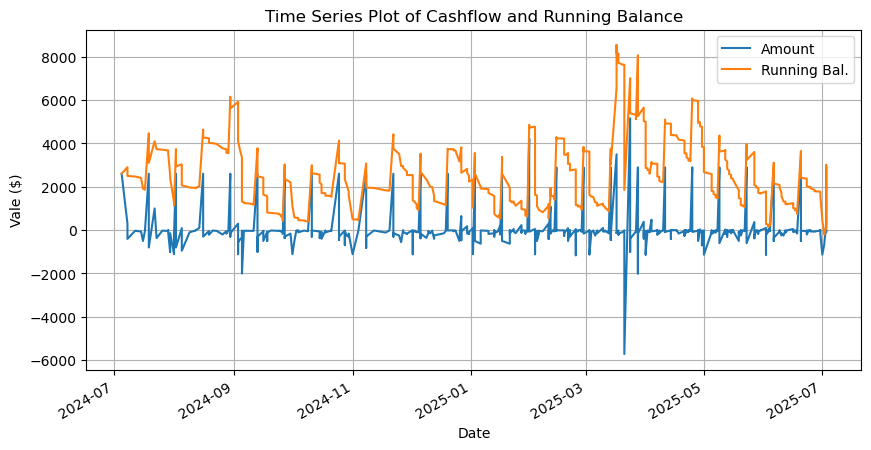

In [92]:
import matplotlib.pyplot as plt

# Plot cashflow and running balance
df[['Amount', 'Running Bal.']].plot(figsize=(10,5))
plt.title('Time Series Plot of Cashflow and Running Balance')
plt.xlabel('Date')
plt.ylabel('Vale ($)')
plt.grid(True)
plt.legend()
plt.show()

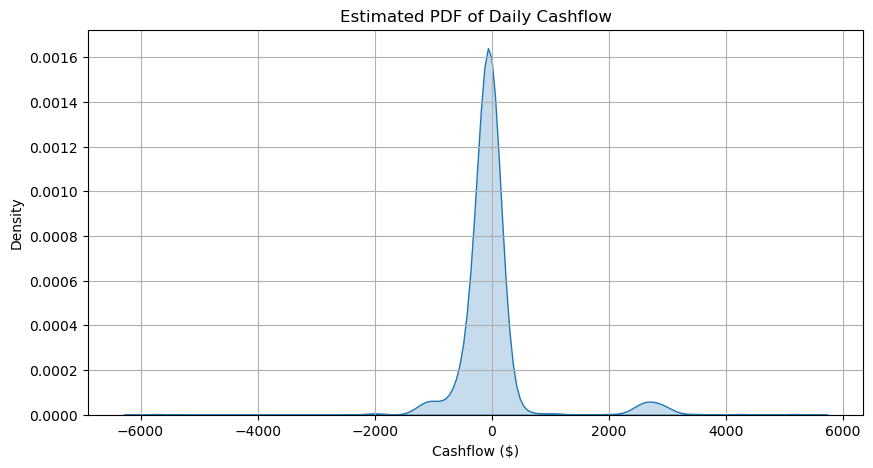

In [93]:
# Probability Density Function (PDF) from daily cashflow data

# 1. Kernel Density Estimation (KDE)
import seaborn as sns

plt.figure(figsize=(10,5))
sns.kdeplot(df['Amount'], fill=True)
plt.title('Estimated PDF of Daily Cashflow')
plt.xlabel('Cashflow ($)')
plt.ylabel('Density')
plt.grid(True)
plt.show()

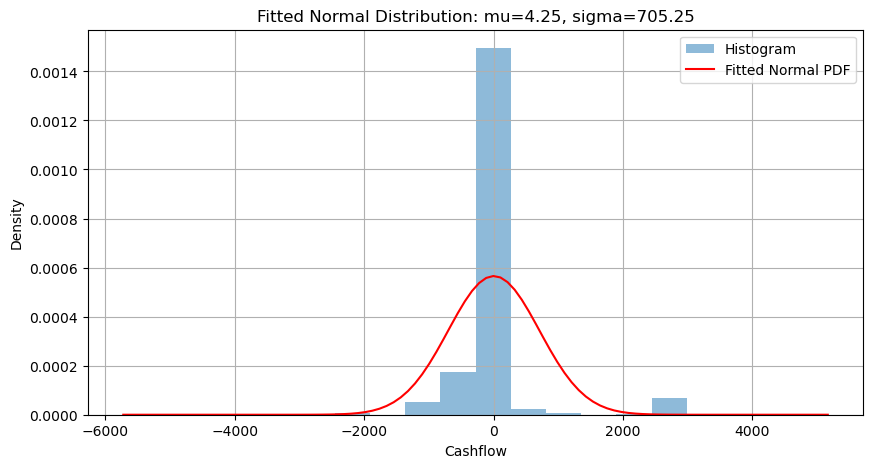

In [94]:
# 2. Fit a distribution (Normal)
import numpy as np
from scipy.stats import norm

# Fit normal distribution
mu, std = norm.fit(df['Amount'])

# Plot histogram and fitted PDF
x = np.linspace(df['Amount'].min(), df['Amount'].max(), 100)
pdf = norm.pdf(x, mu, std)

plt.figure(figsize=(10, 5))
plt.hist(df['Amount'], bins=20, density=True, alpha=0.5, label='Histogram')
plt.plot(x, pdf, 'r-', label='Fitted Normal PDF')
plt.title(f'Fitted Normal Distribution: mu={mu:.2f}, sigma={std:.2f}')
plt.xlabel('Cashflow')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

